# Start

In [4]:
import geopandas as gpd
import fiona
import pandas as pd
pd.options.display.max_columns = 100
# Path to your .gdb file
file_path = "./HSR_KSATD2.gdb/"

# List all layers in the .gdb file
layers = fiona.listlayers(file_path)
for layer in layers:
    print(layer)

# Specify the layer name you're interested in
layer_name = 'Farms'

# Read the layer into a GeoDataFrame
df_farms = gpd.read_file(file_path, layer=layer_name)
layer_name = 'Property'
df_property = gpd.read_file(file_path, layer=layer_name)
layer_name = 'Wells'

# Read the layer into a GeoDataFrame
df_wells = gpd.read_file(file_path, layer=layer_name)




Property
Wells
Farms


In [9]:
df_property.head(10).to_csv('hasar_property.csv')
df_farms.head(10).to_csv('hasar_farms.csv')
df_wells.head(10).to_csv('hasar_wells.csv')

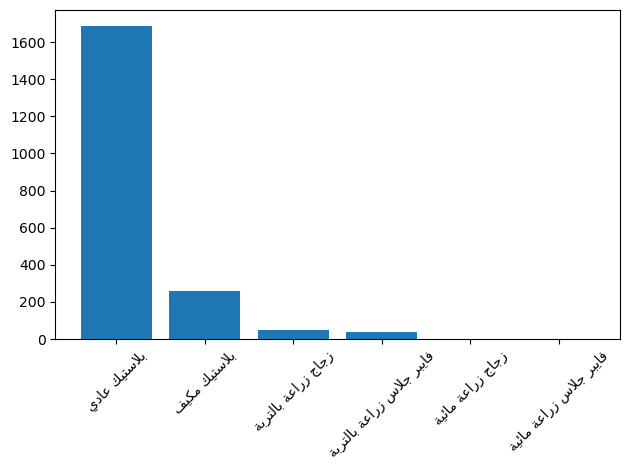

In [32]:
farm_house_type = {
    "بلاستيك عادي": 1,
    "بلاستيك مكيف": 2,
    "زجاج زراعة بالتربة": 3,
    "فايبر جلاس زراعة بالتربة": 4,
    "زجاج زراعة مائية": 6,
    "فايبر جلاس زراعة مائية": 7,
}
farm_house_type = {v:k for k,v in farm_house_type.items()}


import matplotlib.pyplot as plt
import arabic_reshaper
import matplotlib.pyplot as plt
from bidi.algorithm import get_display

x = [ ]

for item in list(farm_house_type.values()):
    x.append(get_display(arabic_reshaper.reshape(item)))
plt.bar(x, df_farms.ProtectedHouseType.value_counts())def get_dummies(df, columns, dtype):
    return pd.get_dummies(df, columns=columns, dtype=dtype, dummy_na=False, drop_first=False)

def count_non_zero_non_nan(df):
    return df.map(lambda x: x != 0).sum()

df_wells = (
    df_wells
    .drop_duplicates()
    .fillna(0)
    .rename(
            columns={
                "HSRCode": "activity_id", 
                "OB_HSRCode": "farm_id",
                "activity_id": "well_activity_count",
                "PossessionType": "well_possession_type",
                "IsActive": "well_is_active",
                "IrragationSource": "well_irrigation_source",
                "IrrigationType": "well_irrigation_type",
                "X": "well_x",
                "Y": "well_y",
                "Region": "well_region",
                "geometry": "well_count",
            }
        )
    .assign(well_is_active = lambda x: x['well_is_active'].astype(int).replace(0,x['well_is_active'].mode()[0]))
    .assign(well_irrigation_source = lambda x: x['well_irrigation_source'].astype(int).replace(0,x['well_irrigation_source'].mode()[0]))
    .assign(well_irrigation_type = lambda x: x['well_irrigation_type'].astype(int).replace(0,x['well_irrigation_type'].mode()[0]))
    .pipe(get_dummies, columns=["well_possession_type", "well_is_active", "well_irrigation_source", "well_irrigation_type"], dtype=int)
    .groupby("farm_id")
    .apply(count_non_zero_non_nan)
    # # # .apply(lambda df: df.notna().astype(int).sum() - df.eq(0).sum())
    .drop(columns=["farm_id", "well_x", "well_y", "well_region"])
    .reset_index()
    
)
df_wells = df_wells.drop(index=0)
df_wells = df_wells.drop(columns=['well_possession_type_2'])
df_wells
# rotate x-axis labels
plt.xticks(rotation=45)
plt.tight_layout()

In [9]:
df_farms[df_farms['OB_HSRCode'] == "04_00_009565"]

,HSRCode,OB_HSRCode,ActivityStatus,FarmType,MainCropsType,CropsType,IrragationSource,IrragationType,FarmingSeason,TotalArea,ProductiveTreesNo,ProtectedHouseNo,ProtectedHouseType,PlantationsNo,PlantationsType,X,Y,SHAPE_Length,SHAPE_Area,geometry


In [13]:
def get_dummies(df, columns, dtype):
    return pd.get_dummies(df, columns=columns, dtype=dtype, dummy_na=False, drop_first=False)

def count_non_zero_non_nan(df):
    return df.map(lambda x: x != 0).sum()

df_wells = (
    df_wells
    .drop_duplicates()
    .fillna(0)
    .rename(
            columns={
                "HSRCode": "activity_id", 
                "OB_HSRCode": "farm_id",
                "activity_id": "well_activity_count",
                "PossessionType": "well_possession_type",
                "IsActive": "well_is_active",
                "IrragationSource": "well_irrigation_source",
                "IrrigationType": "well_irrigation_type",
                "X": "well_x",
                "Y": "well_y",
                "Region": "well_region",
                "geometry": "well_count",
            }
        )
    .assign(well_is_active = lambda x: x['well_is_active'].astype(int).replace(0,x['well_is_active'].mode()[0]))
    .assign(well_irrigation_source = lambda x: x['well_irrigation_source'].astype(int).replace(0,x['well_irrigation_source'].mode()[0]))
    .assign(well_irrigation_type = lambda x: x['well_irrigation_type'].astype(int).replace(0,x['well_irrigation_type'].mode()[0]))
    .pipe(get_dummies, columns=["well_possession_type", "well_is_active", "well_irrigation_source", "well_irrigation_type"], dtype=int)
    .groupby("farm_id")
    .apply(count_non_zero_non_nan)
    # # # .apply(lambda df: df.notna().astype(int).sum() - df.eq(0).sum())
    .drop(columns=["farm_id", "well_x", "well_y", "well_region"])
    .reset_index()
    
)
df_wells = df_wells.drop(index=0)
df_wells = df_wells.drop(columns=['well_possession_type_2'])
df_wells

KeyError: 'well_is_active'

In [186]:
df_farms_count = (
    df_farms.rename(
        columns={
            "HSRCode": "activity_id",
            "OB_HSRCode": "farm_id",
            "ActivityStatus": "farm_activity_status",
            "FarmType": "farm_type",
            "MainCropsType": "farm_main_crops_type",
            "CropsType": "farm_crops_type",
            "IrragationSource": "farm_irrigation_source",
            "IrragationType": "farm_irrigation_type",
            "FarmingSeason": "farm_farming_season",
            "TotalArea": "farm_activity_area_hectares",
            "ProductiveTreesNo": "farm_trees_count",
            "ProtectedHouseNo": "farm_house_count",
            "ProtectedHouseType": "farm_house_type",
            "PlantationsNo": "farm_plantations_count",
            "X": "farm_x",
            "Y": "farm_y",
            "SHAPE_Length": "farm_activity_length_m",
            "SHAPE_Area": "farm_activity_area_sq_m",
            "geometry": "farm_geometry",
            "PlantationsType": "farm_plantations_type",
        }
    )
    .drop_duplicates()
    .fillna(0)
    .assign(farm_activity_status = lambda x: x['farm_activity_status'].replace(0, x['farm_activity_status'].mode()[0]))
    .assign(farm_type = lambda x: x['farm_type'].astype(int).replace(0, x['farm_type'].mode()[0]))
    .assign(farm_main_crops_type = lambda x: x['farm_main_crops_type'].astype(int).replace(0, x['farm_main_crops_type'].mode()[0]))
    .assign(farm_irrigation_source = lambda x: x['farm_irrigation_source'].astype(int).replace(0, x['farm_irrigation_source'].mode()[0]))
    .assign(farm_irrigation_type = lambda x: x['farm_irrigation_type'].astype(int).replace(0, x['farm_irrigation_type'].mode()[0]))
    .assign(farm_farming_season = lambda x: x['farm_farming_season'].astype(int).replace(0, x['farm_farming_season'].mode()[0]))
    .assign(farm_house_type = lambda x: x['farm_house_type'].astype(int).replace(0, x['farm_house_type'].mode()[0]))
    .assign(farm_plantations_type = lambda x: x['farm_plantations_type'].astype(int).replace(0, x['farm_plantations_type'].mode()[0]))
    .pipe(
        get_dummies,
        columns=[
            "farm_main_crops_type",
            "farm_activity_status",
            "farm_type",
            "farm_irrigation_source",
            "farm_irrigation_type",
            "farm_farming_season",
            "farm_house_type",
            "farm_plantations_type"
        ],
        dtype=int,
    )
    .groupby("farm_id")
    .apply(count_non_zero_non_nan)
    .drop(
        columns=[
            "farm_id",
            "farm_x",
            "farm_y",
            "activity_id",
            "farm_crops_type",
            "farm_activity_area_hectares",
            "farm_trees_count",
            "farm_house_count",
            "farm_plantations_count",
            # "farm_plantations_type",
            "farm_activity_length_m",
            "farm_activity_area_sq_m"
            
        ]
    )
    .reset_index()
 )

df_farms_sum = (
    df_farms.rename(
        columns={
            "HSRCode": "activity_id",
            "OB_HSRCode": "farm_id",
            "ActivityStatus": "farm_activity_status",
            "FarmType": "farm_type",
            "MainCropsType": "farm_main_crops_type",
            "CropsType": "farm_crops_type",
            "IrragationSource": "farm_irrigation_source",
            "IrragationType": "farm_irrigation_type",
            "FarmingSeason": "farm_farming_season",
            "TotalArea": "farm_activity_area_hectares",
            "ProductiveTreesNo": "farm_trees_count",
            "ProtectedHouseNo": "farm_house_count",
            "ProtectedHouseType": "farm_house_type",
            "PlantationsNo": "farm_plantations_count",
            "X": "farm_x",
            "Y": "farm_y",
            "SHAPE_Length": "farm_activity_length_m",
            "SHAPE_Area": "farm_activity_area_sq_m",
            "geometry": "farm_geometry",
            "PlantationsType": "farm_plantations_type",
        }
    )
    .drop_duplicates()
    .fillna(0)
    .groupby("farm_id")
    .agg({
        "farm_crops_type": "nunique",
        "farm_activity_area_hectares": "sum",
        "farm_trees_count": "sum",
        "farm_house_count": "sum",
        "farm_plantations_count": "sum",
        # "farm_plantations_type": "nunique",
        "farm_activity_length_m": "sum",
        "farm_activity_area_sq_m": "sum",
    })
    .reset_index()
)

df_farms = df_farms_sum.merge(df_farms_count, on="farm_id", how="inner")
df_farms.head(2)

,farm_id,farm_crops_type,farm_activity_area_hectares,farm_trees_count,farm_house_count,farm_plantations_count,farm_activity_length_m,farm_activity_area_sq_m,farm_geometry,farm_main_crops_type_1,farm_main_crops_type_2,farm_main_crops_type_3,farm_main_crops_type_4,farm_main_crops_type_5,farm_main_crops_type_6,farm_main_crops_type_7,farm_main_crops_type_8,farm_main_crops_type_9,farm_main_crops_type_10,farm_main_crops_type_12,farm_main_crops_type_13,farm_main_crops_type_14,farm_main_crops_type_15,farm_activity_status_1,farm_activity_status_3,farm_activity_status_4,farm_activity_status_6,farm_type_1,farm_type_2,farm_type_5,farm_type_6,farm_type_7,farm_type_10,farm_type_11,farm_irrigation_source_1,farm_irrigation_source_2,farm_irrigation_source_4,farm_irrigation_source_5,farm_irrigation_source_6,farm_irrigation_source_7,farm_irrigation_source_10,farm_irrigation_source_12,farm_irrigation_type_1,farm_irrigation_type_2,farm_irrigation_type_3,farm_irrigation_type_4,farm_irrigation_type_6,farm_irrigation_type_7,farm_farming_season_1,farm_farming_season_2,farm_farming_season_3,farm_farming_season_4,farm_house_type_0,farm_house_type_1,farm_house_type_2,farm_house_type_3,farm_house_type_4,farm_house_type_6,farm_house_type_7,farm_plantations_type_0,farm_plantations_type_1,farm_plantations_type_2,farm_plantations_type_3
0,01_00_000002,3,55.035575,594.0,0.0,0.0,6385.828511,550355.748972,6,4,1,0,0,0,0,0,0,0,0,0,0,0,1,4,1,1,0,0,5,0,1,0,0,0,0,5,0,0,0,0,0,1,4,0,1,0,1,0,4,0,0,2,6,0,0,0,0,0,0,6,0,0,0
1,01_00_000003,1,67.494602,0.0,0.0,0.0,6591.490666,674946.018464,5,5,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,0,0,0,5,0,0,0,0,0,0,5,0,0,0,0,0,0,5,0,0,0,0,0,5,0,0,0,5,0,0,0,0,0,0,5,0,0,0


In [25]:
df_farms_count = (
    df_farms.rename(
        columns={
            "HSRCode": "activity_id",
            "OB_HSRCode": "farm_id",
            "ActivityStatus": "farm_activity_status",
            "FarmType": "farm_type",
            "MainCropsType": "farm_main_crops_type",
            "CropsType": "farm_crops_type",
            "IrragationSource": "farm_irrigation_source",
            "IrragationType": "farm_irrigation_type",
            "FarmingSeason": "farm_farming_season",
            "TotalArea": "farm_activity_area_hectares",
            "ProductiveTreesNo": "farm_trees_count",
            "ProtectedHouseNo": "farm_house_count",
            "ProtectedHouseType": "farm_house_type",
            "PlantationsNo": "farm_plantations_count",
            "X": "farm_x",
            "Y": "farm_y",
            "SHAPE_Length": "farm_activity_length_m",
            "SHAPE_Area": "farm_activity_area_sq_m",
            "geometry": "farm_geometry",
            "PlantationsType": "farm_plantations_type",
        }
    )
    .drop_duplicates()
    .fillna(0)
    .assign(farm_activity_status = lambda x: x['farm_activity_status'].replace(0, x['farm_activity_status'].mode()[0]))
    .assign(farm_type = lambda x: x['farm_type'].astype(int).replace(0, x['farm_type'].mode()[0]))
    .assign(farm_main_crops_type = lambda x: x['farm_main_crops_type'].astype(int).replace(0, x['farm_main_crops_type'].mode()[0]))
    .assign(farm_irrigation_source = lambda x: x['farm_irrigation_source'].astype(int).replace(0, x['farm_irrigation_source'].mode()[0]))
    .assign(farm_irrigation_type = lambda x: x['farm_irrigation_type'].astype(int).replace(0, x['farm_irrigation_type'].mode()[0]))
    .assign(farm_farming_season = lambda x: x['farm_farming_season'].astype(int).replace(0, x['farm_farming_season'].mode()[0]))
    .assign(farm_house_type = lambda x: x['farm_house_type'].astype(int).replace(0, x['farm_house_type'].mode()[0]))
    .assign(farm_plantations_type = lambda x: x['farm_plantations_type'].astype(int).replace(0, x['farm_plantations_type'].mode()[0]))
    .pipe(
        get_dummies,
        columns=[
            "farm_main_crops_type",
            "farm_activity_status",
            "farm_type",
            "farm_irrigation_source",
            "farm_irrigation_type",
            "farm_farming_season",
            "farm_house_type",
            "farm_plantations_type"
        ],
        dtype=int,
    )
    .groupby("farm_id")
    .apply(count_non_zero_non_nan)
    .drop(
        columns=[
            "farm_id",
            "farm_x",
            "farm_y",
            "activity_id",
            "farm_crops_type",
            "farm_activity_area_hectares",
            "farm_trees_count",
            "farm_house_count",
            "farm_plantations_count",
            # "farm_plantations_type",
            "farm_activity_length_m",
            "farm_activity_area_sq_m"
            
        ]
    )
    .reset_index()
 )

df_farms_sum = (
    df_farms.rename(
        columns={
            "HSRCode": "activity_id",
            "OB_HSRCode": "farm_id",
            "ActivityStatus": "farm_activity_status",
            "FarmType": "farm_type",
            "MainCropsType": "farm_main_crops_type",
            "CropsType": "farm_crops_type",
            "IrragationSource": "farm_irrigation_source",
            "IrragationType": "farm_irrigation_type",
            "FarmingSeason": "farm_farming_season",
            "TotalArea": "farm_activity_area_hectares",
            "ProductiveTreesNo": "farm_trees_count",
            "ProtectedHouseNo": "farm_house_count",
            "ProtectedHouseType": "farm_house_type",
            "PlantationsNo": "farm_plantations_count",
            "X": "farm_x",
            "Y": "farm_y",
            "SHAPE_Length": "farm_activity_length_m",
            "SHAPE_Area": "farm_activity_area_sq_m",
            "geometry": "farm_geometry",
            "PlantationsType": "farm_plantations_type",
        }
    )
    .drop_duplicates()
    .fillna(0)
    .groupby("farm_id")
    .agg({
        "farm_crops_type": "nunique",
        "farm_activity_status": "nunique",
        "farm_type": "nunique",
        "farm_irrigation_source": "nunique",
        "farm_irrigation_type": "nunique",
        "farm_activity_area_hectares": "sum",
        "farm_trees_count": "sum",
        "farm_house_count": "sum",
        "farm_plantations_count": "sum",
        # "farm_plantations_type": "nunique",
        "farm_activity_length_m": "sum",
        "farm_activity_area_sq_m": "sum",
    })
    .reset_index()
)

df_farms_count = df_farms_count.drop(columns=['farm_house_type_0'])
df_farms = df_farms_sum.merge(df_farms_count, on="farm_id", how="inner")
df_farms = df_farms.rename(columns={"farm_crops_type":"main_crop_type"})
df_farms.head(2)

,farm_id,main_crop_type,farm_activity_status,farm_type,farm_irrigation_source,farm_irrigation_type,farm_activity_area_hectares,farm_trees_count,farm_house_count,farm_plantations_count,farm_activity_length_m,farm_activity_area_sq_m,farm_geometry,farm_main_crops_type_1,farm_main_crops_type_2,farm_main_crops_type_3,farm_main_crops_type_4,farm_main_crops_type_5,farm_main_crops_type_6,farm_main_crops_type_7,farm_main_crops_type_8,farm_main_crops_type_9,farm_main_crops_type_10,farm_main_crops_type_12,farm_main_crops_type_13,farm_main_crops_type_14,farm_main_crops_type_15,farm_activity_status_1,farm_activity_status_3,farm_activity_status_4,farm_activity_status_6,farm_type_1,farm_type_2,farm_type_5,farm_type_6,farm_type_7,farm_type_10,farm_type_11,farm_irrigation_source_1,farm_irrigation_source_2,farm_irrigation_source_4,farm_irrigation_source_5,farm_irrigation_source_6,farm_irrigation_source_7,farm_irrigation_source_10,farm_irrigation_source_12,farm_irrigation_type_1,farm_irrigation_type_2,farm_irrigation_type_3,farm_irrigation_type_4,farm_irrigation_type_6,farm_irrigation_type_7,farm_farming_season_1,farm_farming_season_2,farm_farming_season_3,farm_farming_season_4,farm_house_type_0,farm_house_type_1,farm_house_type_2,farm_house_type_3,farm_house_type_4,farm_house_type_6,farm_house_type_7,farm_plantations_type_0,farm_plantations_type_1,farm_plantations_type_2,farm_plantations_type_3
0,01_00_000002,3,3,2,2,3,55.035575,594.0,0.0,0.0,6385.828511,550355.748972,6,4,1,0,0,0,0,0,0,0,0,0,0,0,1,4,1,1,0,0,5,0,1,0,0,0,0,5,0,0,0,0,0,1,4,0,1,0,1,0,4,0,0,2,6,0,0,0,0,0,0,6,0,0,0
1,01_00_000003,1,1,1,1,1,67.494602,0.0,0.0,0.0,6591.490666,674946.018464,5,5,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,0,0,0,5,0,0,0,0,0,0,5,0,0,0,0,0,0,5,0,0,0,0,0,5,0,0,0,5,0,0,0,0,0,0,5,0,0,0


In [26]:
df_farms

,farm_id,main_crop_type,farm_activity_status,farm_type,farm_irrigation_source,farm_irrigation_type,farm_activity_area_hectares,farm_trees_count,farm_house_count,farm_plantations_count,farm_activity_length_m,farm_activity_area_sq_m,farm_geometry,farm_main_crops_type_1,farm_main_crops_type_2,farm_main_crops_type_3,farm_main_crops_type_4,farm_main_crops_type_5,farm_main_crops_type_6,farm_main_crops_type_7,farm_main_crops_type_8,farm_main_crops_type_9,farm_main_crops_type_10,farm_main_crops_type_12,farm_main_crops_type_13,farm_main_crops_type_14,farm_main_crops_type_15,farm_activity_status_1,farm_activity_status_3,farm_activity_status_4,farm_activity_status_6,farm_type_1,farm_type_2,farm_type_5,farm_type_6,farm_type_7,farm_type_10,farm_type_11,farm_irrigation_source_1,farm_irrigation_source_2,farm_irrigation_source_4,farm_irrigation_source_5,farm_irrigation_source_6,farm_irrigation_source_7,farm_irrigation_source_10,farm_irrigation_source_12,farm_irrigation_type_1,farm_irrigation_type_2,farm_irrigation_type_3,farm_irrigation_type_4,farm_irrigation_type_6,farm_irrigation_type_7,farm_farming_season_1,farm_farming_season_2,farm_farming_season_3,farm_farming_season_4,farm_house_type_0,farm_house_type_1,farm_house_type_2,farm_house_type_3,farm_house_type_4,farm_house_type_6,farm_house_type_7,farm_plantations_type_0,farm_plantations_type_1,farm_plantations_type_2,farm_plantations_type_3
0,01_00_000002,3,3,2,2,3,55.035575,594.0,0.0,0.0,6385.828511,550355.748972,6,4,1,0,0,0,0,0,0,0,0,0,0,0,1,4,1,1,0,0,5,0,1,0,0,0,0,5,0,0,0,0,0,1,4,0,1,0,1,0,4,0,0,2,6,0,0,0,0,0,0,6,0,0,0
1,01_00_000003,1,1,1,1,1,67.494602,0.0,0.0,0.0,6591.490666,674946.018464,5,5,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,0,0,0,5,0,0,0,0,0,0,5,0,0,0,0,0,0,5,0,0,0,0,0,5,0,0,0,5,0,0,0,0,0,0,5,0,0,0
2,01_00_000006,1,1,1,1,1,30.682688,0.0,0.0,0.0,1963.800474,306826.883820,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0
3,01_00_000008,4,2,2,1,2,46.750421,0.0,0.0,0.0,6579.811336,467504.206030,11,2,0,0,9,0,0,0,0,0,0,0,0,0,0,5,6,0,0,9,2,0,0,0,0,0,0,11,0,0,0,0,0,0,2,9,0,0,0,0,4,0,1,6,11,0,0,0,0,0,0,11,0,0,0
4,01_00_000009,1,1,1,1,1,27.911888,0.0,0.0,0.0,2870.402166,279118.875924,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,2,0,0,0,0,0,0,2,0,0,0,0,0,0,2,0,0,0,0,0,0,0,2,0,2,0,0,0,0,0,0,2,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17365,13_00_014341,2,1,3,1,2,30.365888,4564.0,0.0,0.0,3909.294355,303658.879524,4,1,1,0,0,0,0,0,0,0,2,0,0,0,0,4,0,0,0,0,1,0,1,2,0,0,0,4,0,0,0,0,0,0,1,0,3,0,0,0,1,0,3,0,4,0,0,0,0,0,0,4,0,0,0
17366,13_00_014422,1,1,1,1,1,13.711515,0.0,0.0,0.0,1536.658339,137115.146170,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0
17367,13_00_016808,1,1,1,1,1,60.445241,0.0,0.0,0.0,2766.225886,604452.407108,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0
17368,13_00_016813,2,1,1,1,1,87.881187,0.0,0.0,0.0,5366.694246,878811.872290,3,3,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,3,0,0,0,0,0,0,3,0,0,0,0,0,0,3,0,0,0,0,0,0,2,1,0,3,0,0,0,0,0,0,3,0,0,0


In [27]:
df_property = (
    df_property[["OB_HSRCode", "SHAPE_Area", "MainType"]].rename(
        columns={
            "OB_HSRCode": "farm_id",
            "SHAPE_Area": "property_area",
            "MainType": "property_main_type",
        }
    )
)
df_property

,farm_id,property_area,property_main_type
0,05_00_000030,3.565259e+06,3.0
1,05_00_000090,3.681615e+06,3.0
2,05_00_000051,2.555279e+06,3.0
3,05_00_000067,1.168098e+06,3.0
4,05_00_000177,1.337747e+06,3.0
...,...,...,...
18308,06_00_008951,6.254972e+05,1.0
18309,06_00_008965,8.418189e+05,1.0
18310,06_00_008968,7.502167e+05,1.0
18311,06_00_009342,1.697147e+06,1.0


In [28]:
df_final = df_property.merge(df_wells, on="farm_id", how="inner").merge(df_farms, on="farm_id", how="inner")

In [29]:
df_final['main_crop_type']

0        1
1        2
2        2
3        5
4        1
        ..
15453    5
15454    5
15455    2
15456    2
15457    1
Name: main_crop_type, Length: 15458, dtype: int64

In [30]:
df_final.to_csv("./processed_data/all_hasar_combined_updated.csv", index=False)

# End

In [89]:
df_farms['geometry']

0        MULTIPOLYGON (((268048.386 2977924.584, 268031...
1        MULTIPOLYGON (((268029.366 2977911.387, 268011...
2        MULTIPOLYGON (((267856.534 2977757.741, 267808...
3        MULTIPOLYGON (((268234.380 2977995.932, 268143...
4        MULTIPOLYGON (((267900.463 2977785.161, 267858...
                               ...                        
68387    MULTIPOLYGON (((-361790.932 1855816.623, -3617...
68388    MULTIPOLYGON (((-361763.077 1855243.912, -3618...
68389    MULTIPOLYGON (((-357599.808 1858331.667, -3576...
68390    MULTIPOLYGON (((-357513.007 1858568.370, -3575...
68391    MULTIPOLYGON (((-357556.017 1858568.349, -3576...
Name: geometry, Length: 68392, dtype: geometry

In [23]:
# Path to your .gdb file
file_path = "./HSR_KSATD1.gdb/HSR_KSATD1.gdb"

# List all layers in the .gdb file
layers = fiona.listlayers(file_path)
for layer in layers:
    print(layer)

# Specify the layer name you're interested in
layer_name = 'Property'

# Read the layer into a GeoDataFrame
df_property = gpd.read_file(file_path, layer=layer_name)


Property
Wells
Farms


In [41]:

df_property['OB_HSRCode'].nunique()

18311

In [168]:
df_farms.to_csv('./processed_data/hasar_farms.csv', index=False)

In [169]:
df_property.to_csv('./processed_data/hasar_property.csv', index=False)

In [170]:
df_wells.to_csv('./processed_data/hasar_wells.csv', index=False)

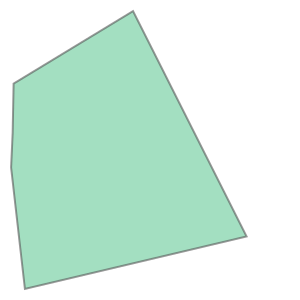

In [17]:
df_property['geometry'][0]

In [129]:
# Path to your .gdb file
file_path = "./HSR_KSATD1.gdb/HSR_KSATD1.gdb"

# List all layers in the .gdb file
layers = fiona.listlayers(file_path)
for layer in layers:
    gdf = gpd.read_file(file_path, layer=layer)
    print(f"Layer: {layer}, CRS: {gdf.crs}")

# Specify the layer name you're interested in
layer_name = 'Wells'

# Read the layer into a GeoDataFrame
df_wells = gpd.read_file(file_path, layer=layer_name)



Layer: Property, CRS: EPSG:32639
Layer: Wells, CRS: EPSG:32639
Layer: Farms, CRS: EPSG:32639


In [171]:
df_wells

,HSRCode,OB_HSRCode,PossessionType,IsActive,IrragationSource,IrrigationType,X,Y,Region,geometry
0,05_10_000683,05_00_003440,1,1,2,3.0,48.820924,26.962683,5.0,POINT (283700.298 2984167.590)
1,05_10_000176,05_00_002716,1,1,2,3.0,48.798464,26.956931,5.0,POINT (281459.151 2983568.905)
2,05_10_001562,05_00_001754,1,1,2,1.0,48.828529,26.963245,5.0,POINT (284456.482 2984216.863)
3,05_10_001269,05_00_004920,1,1,2,3.0,48.725944,27.007551,5.0,POINT (274359.078 2989305.743)
4,05_10_002665,05_00_003441,1,1,2,3.0,48.523927,27.148122,5.0,POINT (254613.759 3005261.661)
...,...,...,...,...,...,...,...,...,...,...
30104,10_10_001662,10_00_126431,1,1,2,3.0,42.634884,17.196146,10.0,POINT (-392113.297 1920605.967)
30105,10_10_001663,10_00_126431,1,1,2,3.0,42.635226,17.199678,10.0,POINT (-392059.482 1920998.602)
30106,10_10_001667,10_00_126431,1,1,2,3.0,42.631506,17.198558,10.0,POINT (-392463.956 1920890.889)
30107,10_10_001669,10_00_126431,1,1,2,3.0,42.632024,17.195939,10.0,POINT (-392421.141 1920596.176)


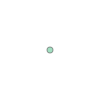

In [21]:
df_wells['geometry'][1]

In [172]:
df_farms['OB_HSRCode'].nunique(), df_property['OB_HSRCode'].nunique(), df_wells['OB_HSRCode'].nunique()

(17370, 18311, 16018)

In [177]:
df_wells.head()

,HSRCode,OB_HSRCode,PossessionType,IsActive,IrragationSource,IrrigationType,X,Y,Region,geometry
0,05_10_000683,05_00_003440,1,1,2,3.0,48.820924,26.962683,5.0,POINT (283700.298 2984167.590)
1,05_10_000176,05_00_002716,1,1,2,3.0,48.798464,26.956931,5.0,POINT (281459.151 2983568.905)
2,05_10_001562,05_00_001754,1,1,2,1.0,48.828529,26.963245,5.0,POINT (284456.482 2984216.863)
3,05_10_001269,05_00_004920,1,1,2,3.0,48.725944,27.007551,5.0,POINT (274359.078 2989305.743)
4,05_10_002665,05_00_003441,1,1,2,3.0,48.523927,27.148122,5.0,POINT (254613.759 3005261.661)


In [179]:
df_property.OB_HSRCode.nunique(), df_farms.OB_HSRCode.nunique(), df_wells.OB_HSRCode.nunique(), df_farms.HSRCode.nunique(), df_wells.HSRCode.nunique()

(18311, 17370, 16018, 68392, 30109)

In [174]:
df_property.shape, df_farms.shape, df_wells.shape

((18313, 9), (68396, 20), (30109, 10))

In [218]:
df_hasar_new = df_property.merge(df_farms, on='OB_HSRCode', how='left')
df_hasar_new_ = df_hasar_new.merge(df_wells, on='OB_HSRCode', how='left')

In [219]:
df_hasar_new_.head(1)

,OB_HSRCode,X_x,Y_x,MainType,Region_x,Province,SHAPE_Length_x,SHAPE_Area_x,geometry_x,HSRCode_x,ActivityStatus,FarmType,MainCropsType,CropsType,IrragationSource_x,IrragationType,FarmingSeason,TotalArea,ProductiveTreesNo,ProtectedHouseNo,ProtectedHouseType,PlantationsNo,PlantationsType,X_y,Y_y,SHAPE_Length_y,SHAPE_Area_y,geometry_y,HSRCode_y,PossessionType,IsActive,IrragationSource_y,IrrigationType,X,Y,Region_y,geometry
0,05_00_000030,27.174437,48.713781,3.0,5,509.0,7671.129395,3.565259e+06,"MULTIPOLYGON (((274765.681 3007140.632, 272707...",05_01_045670,1.0,7.0,14.0,None,2.0,3.0,3.0,0.610111,180.0,NaN,NaN,NaN,NaN,48.713368,27.172872,838.939119,6101.109158,"MULTIPOLYGON (((273346.240 3007610.174, 273346...",05_10_002750,1.0,2.0,2.0,3.0,48.712596,27.172099,5.0,POINT (273365.946 3007563.604)


In [220]:
df_hasar_new_.shape

(160973, 37)

In [202]:
df_hasar_new.head(1)

,OB_HSRCode,X_x,Y_x,MainType,Region,Province,SHAPE_Length_x,SHAPE_Area_x,geometry_x,HSRCode,ActivityStatus,FarmType,MainCropsType,CropsType,IrragationSource,IrragationType,FarmingSeason,TotalArea,ProductiveTreesNo,ProtectedHouseNo,ProtectedHouseType,PlantationsNo,PlantationsType,X_y,Y_y,SHAPE_Length_y,SHAPE_Area_y,geometry_y
0,05_00_000030,27.174437,48.713781,3.0,5,509.0,7671.129395,3.565259e+06,"MULTIPOLYGON (((274765.681 3007140.632, 272707...",05_01_045670,1.0,7.0,14.0,None,2.0,3.0,3.0,0.610111,180.0,NaN,NaN,NaN,NaN,48.713368,27.172872,838.939119,6101.109158,"MULTIPOLYGON (((273346.240 3007610.174, 273346..."


In [231]:
df_hasar_new_.columns = [
    'farm_id',
    'x_coordinate',
    'y_coordinate',
    'main_type',
    'region',
    'province',
    'property_length',
    'property_area',
    'property_geometry',
    'farm_activity_id',
    'activity_status',
    'farm_type',
    'main_crops_type',
    'crops_type',
    'irrigation_source',
    'irrigation_type',
    'farming_season',
    'total_area',
    'trees',
    'protected_houses',
    'protected_houses_type',
    'plantations',
    'plantations_type',
    'farm_activity_x_coordinate',
    'farm_activity_y_coordinate',
    'farm_length',
    'farm_area',
    'farm_geometry',
    'farm_activity',
    'well_possession_type',
    'well_active',
    'well_irrigation_source',
    'well_irrigation_type',
    'well_y_coordinate',
    'well_x_coordinate',
    'well_region',
    'well_geometry',
]


In [226]:
df_hasar_new_.shape

(160973, 37)

In [232]:
df_hasar_new_.columns

Index(['farm_id', 'x_coordinate', 'y_coordinate', 'main_type', 'region',
       'province', 'property_length', 'property_area', 'property_geometry',
       'farm_activity_id', 'activity_status', 'farm_type', 'main_crops_type',
       'crops_type', 'irrigation_source', 'irrigation_type', 'farming_season',
       'total_area', 'trees', 'protected_houses', 'protected_houses_type',
       'plantations', 'plantations_type', 'farm_activity_x_coordinate',
       'farm_activity_y_coordinate', 'farm_length', 'farm_area',
       'farm_geometry', 'farm_activity', 'well_possession_type', 'well_active',
       'well_irrigation_source', 'well_irrigation_type', 'well_y_coordinate',
       'well_x_coordinate', 'well_region', 'well_geometry'],
      dtype='object')

In [234]:
df_hasar_new_.to_csv('./processed_data/all_hasar_combined.csv', index=False)

In [239]:
df_hasar_new_

,farm_id,x_coordinate,y_coordinate,main_type,region,province,property_length,property_area,property_geometry,farm_activity_id,activity_status,farm_type,main_crops_type,crops_type,irrigation_source,irrigation_type,farming_season,total_area,trees,protected_houses,protected_houses_type,plantations,plantations_type,farm_activity_x_coordinate,farm_activity_y_coordinate,farm_length,farm_area,farm_geometry,farm_activity,well_possession_type,well_active,well_irrigation_source,well_irrigation_type,well_y_coordinate,well_x_coordinate,well_region,well_geometry
0,05_00_000030,27.174437,48.713781,3.0,5,509.0,7671.129395,3.565259e+06,"MULTIPOLYGON (((274765.681 3007140.632, 272707...",05_01_045670,1.0,7.0,14.0,None,2.0,3.0,3.0,0.610111,180.0,NaN,NaN,NaN,NaN,48.713368,27.172872,838.939119,6.101109e+03,"MULTIPOLYGON (((273346.240 3007610.174, 273346...",05_10_002750,1.0,2.0,2.0,3.0,48.712596,27.172099,5.0,POINT (273365.946 3007563.604)
1,05_00_000090,27.142062,48.604717,3.0,5,509.0,8237.605854,3.681615e+06,"MULTIPOLYGON (((263199.744 3005454.466, 263600...",05_01_029947,1.0,2.0,1.0,رودس,2.0,1.0,1.0,42.556308,0.0,NaN,NaN,NaN,NaN,48.608324,27.146462,2312.568926,4.255631e+05,"MULTIPOLYGON (((262985.708 3004547.476, 262978...",05_10_006176,1.0,2.0,2.0,1.0,48.606246,27.142776,5.0,POINT (262763.347 3004510.900)
2,05_00_000090,27.142062,48.604717,3.0,5,509.0,8237.605854,3.681615e+06,"MULTIPOLYGON (((263199.744 3005454.466, 263600...",05_01_029947,1.0,2.0,1.0,رودس,2.0,1.0,1.0,42.556308,0.0,NaN,NaN,NaN,NaN,48.608324,27.146462,2312.568926,4.255631e+05,"MULTIPOLYGON (((262985.708 3004547.476, 262978...",05_10_006178,1.0,2.0,2.0,1.0,48.605914,27.136823,5.0,POINT (262717.831 3003851.812)
3,05_00_000090,27.142062,48.604717,3.0,5,509.0,8237.605854,3.681615e+06,"MULTIPOLYGON (((263199.744 3005454.466, 263600...",05_01_029947,1.0,2.0,1.0,رودس,2.0,1.0,1.0,42.556308,0.0,NaN,NaN,NaN,NaN,48.608324,27.146462,2312.568926,4.255631e+05,"MULTIPOLYGON (((262985.708 3004547.476, 262978...",05_10_005480,1.0,2.0,2.0,1.0,48.611684,27.140288,5.0,POINT (263297.270 3004224.876)
4,05_00_000090,27.142062,48.604717,3.0,5,509.0,8237.605854,3.681615e+06,"MULTIPOLYGON (((263199.744 3005454.466, 263600...",05_01_029947,1.0,2.0,1.0,رودس,2.0,1.0,1.0,42.556308,0.0,NaN,NaN,NaN,NaN,48.608324,27.146462,2312.568926,4.255631e+05,"MULTIPOLYGON (((262985.708 3004547.476, 262978...",05_10_004362,1.0,2.0,2.0,1.0,48.596935,27.141110,5.0,POINT (261836.767 3004343.938)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160968,06_00_008965,41.565285,18.679834,1.0,6,604.0,4157.116875,8.418189e+05,"MULTIPOLYGON (((-498053.021 2092480.655, -4977...",06_01_006359,1.0,11.0,1.0,None,10.0,4.0,1.0,83.762159,NaN,NaN,NaN,NaN,NaN,41.565287,18.679835,4148.599235,8.376216e+05,"MULTIPOLYGON (((-498375.111 2091613.614, -4993...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
160969,06_00_008968,41.560166,18.672380,1.0,6,604.0,3602.602617,7.502167e+05,"MULTIPOLYGON (((-499650.348 2091086.734, -4997...",06_01_006362,1.0,11.0,1.0,None,10.0,4.0,1.0,74.657973,NaN,NaN,NaN,NaN,NaN,41.560166,18.672379,3594.418840,7.465797e+05,"MULTIPOLYGON (((-498493.219 2090942.856, -4995...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
160970,06_00_009342,42.828675,20.301142,1.0,6,631.0,5501.131914,1.697147e+06,"MULTIPOLYGON (((-356352.135 2266031.044, -3561...",06_01_006663,1.0,6.0,2.0,None,2.0,3.0,1.0,169.160325,NaN,NaN,NaN,NaN,NaN,42.828675,20.301142,5492.890642,1.691603e+06,"MULTIPOLYGON (((-354313.452 2266040.788, -3546...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
160971,06_00_012125,42.982994,18.492563,1.0,6,601.0,6039.738298,1.363686e+06,"MULTIPOLYGON (((-348848.708 2063916.299, -3487...",06_01_008675,1.0,5.0,4.0,طماطم خيار,2.0,3.0,3.0,135.760091,NaN,NaN,NaN,NaN,NaN,42.982995,18.492565,6030.483981,1.357601e+06,"MULTIPOLYGON (((-347445.341 2063909.298, -3474...",06_10_001372,1.0,1.0,2.0,3.0,42.992732,18.494871,6.0,POINT (-347493.831 2063810.620)


In [77]:
import folium
import pandas as pd
from shapely import wkt, Polygon
from folium import Popup

In [86]:
row = df_farms.iloc[0]

In [122]:
df_farms = pd.read_csv('./processed_data/hasar_farms.csv')


In [123]:
df_farms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68392 entries, 0 to 68391
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   OB_HSRCode    68392 non-null  object 
 1   FarmType      67189 non-null  float64
 2   SHAPE_Length  68392 non-null  float64
 3   SHAPE_Area    68392 non-null  float64
 4   geometry      68392 non-null  object 
dtypes: float64(3), object(2)
memory usage: 2.6+ MB


In [124]:
from shapely import wkt
import geopandas as gpd
import pandas as pd

# Load your DataFrame here (example: farms_df)
# farms_df = pd.read_csv('your_farms_data.csv')

# Convert the 'geometry' column from WKT strings to shapely objects
df_farms['geometry'] = df_farms['geometry'].apply(wkt.loads)

# Now create the GeoDataFrame, specifying the converted 'geometry' column
farms_gdf = gpd.GeoDataFrame(df_farms, geometry='geometry', crs="EPSG:4326")

In [127]:
df_wells

,OB_HSRCode,X,Y,geometry
0,05_00_003440,48.820924,26.962683,POINT (283700.298 2984167.590)
1,05_00_002716,48.798464,26.956931,POINT (281459.151 2983568.905)
2,05_00_001754,48.828529,26.963245,POINT (284456.482 2984216.863)
3,05_00_004920,48.725944,27.007551,POINT (274359.078 2989305.743)
4,05_00_003441,48.523927,27.148122,POINT (254613.759 3005261.661)
...,...,...,...,...
29341,10_00_126431,42.634884,17.196146,POINT (-392113.297 1920605.967)
29342,10_00_126431,42.635226,17.199678,POINT (-392059.482 1920998.602)
29343,10_00_126431,42.631506,17.198558,POINT (-392463.956 1920890.889)
29344,10_00_126431,42.632024,17.195939,POINT (-392421.141 1920596.176)
